<a href="https://colab.research.google.com/github/kartik-das/Covid-19-Detection-Through-Chest-X-Ray-Images-A-Deep-Learning-Approach/blob/main/MobileNet_model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_dir=r'/content/drive/MyDrive/Curated S Dataset/train'
validation_dir=r'/content/drive/MyDrive/Curated S Dataset/val'
test_dir=r'/content/drive/MyDrive/Curated S Dataset/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_datagenerator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse'
)

Found 6480 images belonging to 3 classes.


In [ ]:
validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse'
)

Found 1851 images belonging to 3 classes.


In [ ]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse'
)

Found 927 images belonging to 3 classes.


In [ ]:
import keras
from keras import backend as K
from tensorflow.keras.layers import Dense, Activation

from tensorflow.keras import optimizers
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from tensorflow.keras import optimizers

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [ ]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

#step_size_train=train_datagenerator.n//train_datagenerator.batch_size
#history = model.fit_generator(generator=train_datagenerator,
                   #steps_per_epoch=step_size_train,
                   #epochs=25)
history=model.fit(
    train_datagenerator,
    steps_per_epoch=train_datagenerator.n/train_datagenerator.batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.n/validation_generator.batch_size
)

Epoch 1/25
203/202 [==============================] - ETA: -17s - loss: 0.3456 - accuracy: 0.8843

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150,1))
    print(img)
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


img_path = '/content/drive/MyDrive/Curated S Dataset/test/Covid/COVID-19 (1008).jpg'
new_image = load_image(img_path)
print(new_image.shape)
pred = model.predict(new_image)

pred = np.argmax(pred)
pred

<PIL.Image.Image image mode=RGB size=150x150 at 0x7FCE8E375110>
(1, 150, 150, 3)


0

In [ ]:
model.save('MobileNet_model_final__.h5')

In [ ]:
score = model.evaluate_generator(validation_generator)
print('final val_loss:', score[0])
print('final val_acc:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


final val_loss: 0.1634938269853592
final val_acc: 0.9551593661308289


In [ ]:
score = model.evaluate_generator(test_generator)
print('final test_loss:', score[0])
print('final test_acc:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


final test_loss: 0.1504877209663391
final test_acc: 0.9602150321006775


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:

def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Confusion Matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in test_datagen.flow_from_directory(data_path, target_size=(150,150), shuffle=False, batch_size= 64):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm


cm = get_confusion_matrix(train_dir, 6484 )
print(cm)
valid_cm = get_confusion_matrix(test_dir, 930 )
print(valid_cm)




Confusion Matrix 6484
Found 6485 images belonging to 3 classes.
50
100
[[ 877   27   26]
 [   8 2256   30]
 [   0  151 3110]]
Confusion Matrix 930
Found 930 images belonging to 3 classes.
[[128   3   3]
 [  1 325   3]
 [  0  14 453]]


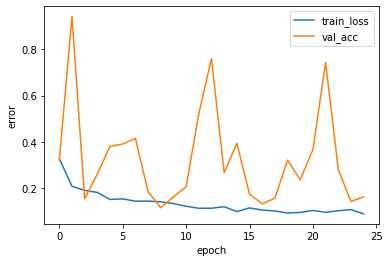

In [ ]:
#ploting some data:

#loss :
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()



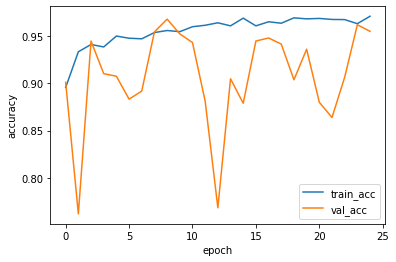

In [ ]:
#accuracies :
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
labels = ['Covid', 'Normal', 'Other']

Confussion Matrix
[[ 877   27   26]
 [   8 2256   30]
 [   0  151 3110]]


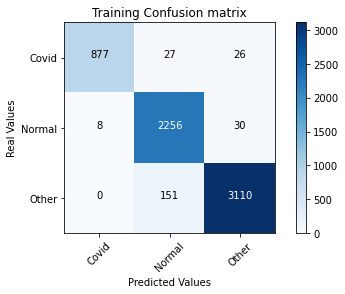

Confussion Matrix
[[128   3   3]
 [  1 325   3]
 [  0  14 453]]


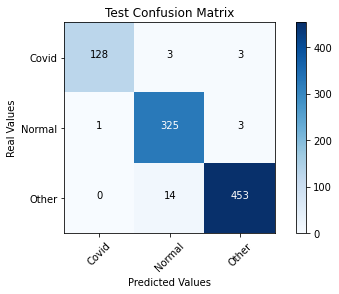

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import os


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues,
                          sv_dir=None):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized Confusion Matrix")
  else:
      print('Confussion Matrix')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('Real Values')
  plt.xlabel('Predicted Values')
  if sv_dir is not None:
    plt.savefig(sv_dir)
  plt.show()


def y2indicator(Y):
  K = len(set(Y))
  N = len(Y)
  I = np.empty((N, K))
  I[np.arange(N), Y] = 1
  return I
plot_confusion_matrix(
  cm,
  labels,
  title='Training Confusion matrix'
)

plot_confusion_matrix(
  valid_cm,
  labels,
  title='Test Confusion Matrix'
)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("[INFO] evaluating network...")
N=900
predictions = []
targets = []
i = 0
for x, y in test_datagen.flow_from_directory(test_dir, target_size=(150,150), shuffle=False, batch_size= 64):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

print(classification_report(targets, predictions, target_names=labels))

[INFO] evaluating network...
Found 930 images belonging to 3 classes.
              precision    recall  f1-score   support

       Covid       0.99      0.96      0.97       134
      Normal       0.95      0.99      0.97       329
       Other       0.99      0.97      0.98       467

    accuracy                           0.97       930
   macro avg       0.98      0.97      0.97       930
weighted avg       0.97      0.97      0.97       930

